In [1]:
# step 1: Import The Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#step 2: load The DataSet
df = pd.read_csv(r"C:\Users\venky\OneDrive\Desktop\e-commerce-analytics\data\raw data\train.csv")

In [3]:
#  Step 3: Get a quick overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [6]:
# --- DATA CLEANING ---
# Step 4: Convert 'Order Date' from a string to a proper datetime format
# This is crucial for time-series analysis
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

In [7]:
# --- CALCULATING KEY PERFORMANCE INDICATORS (KPIs) ---
total_sales = df['Sales'].sum()
total_orders = df['Order ID'].nunique()
unique_customers = df['Customer ID'].nunique()
avg_sales_per_order = total_sales / total_orders

In [8]:
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Number of Orders: {total_orders:,}")
print(f"Total Number of Unique Customers: {unique_customers:,}")
print(f"Average Sales Value per Order: ${avg_sales_per_order:,.2f}")

Total Sales: $2,261,536.78
Total Number of Orders: 4,922
Total Number of Unique Customers: 793
Average Sales Value per Order: $459.48


In [9]:
# --- DATA ANALYSIS & VISUALIZATION ---
sns.set_style('whitegrid')

In [10]:
print("\n--- Analyzing Sales by Category ---")
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(category_sales)


--- Analyzing Sales by Category ---
Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64


C:\Users\venky\AppData\Local\Temp\ipykernel_7772\276674435.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')


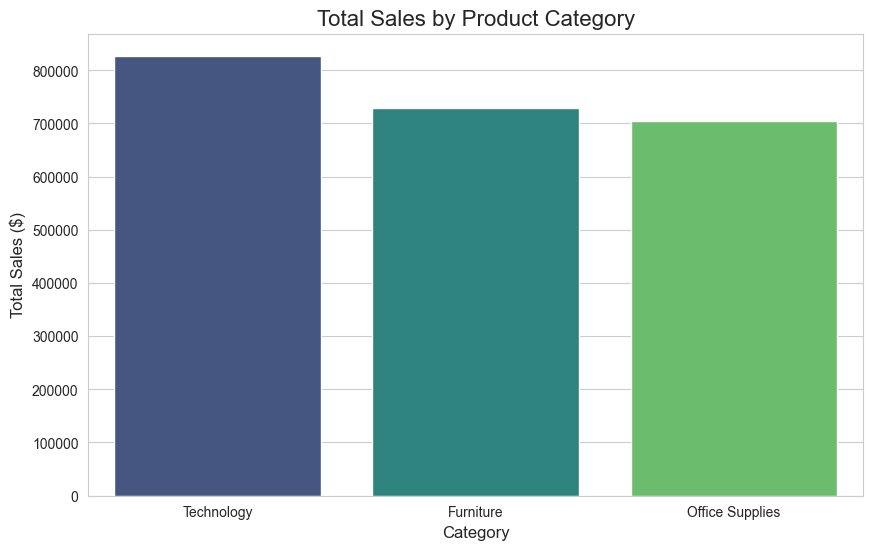

In [11]:
# Create a bar chart to visualize sales by category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.show()

In [12]:
print("\n--- Analyzing Sales by Customer Segment ---")
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
print(segment_sales)


--- Analyzing Sales by Customer Segment ---
Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64


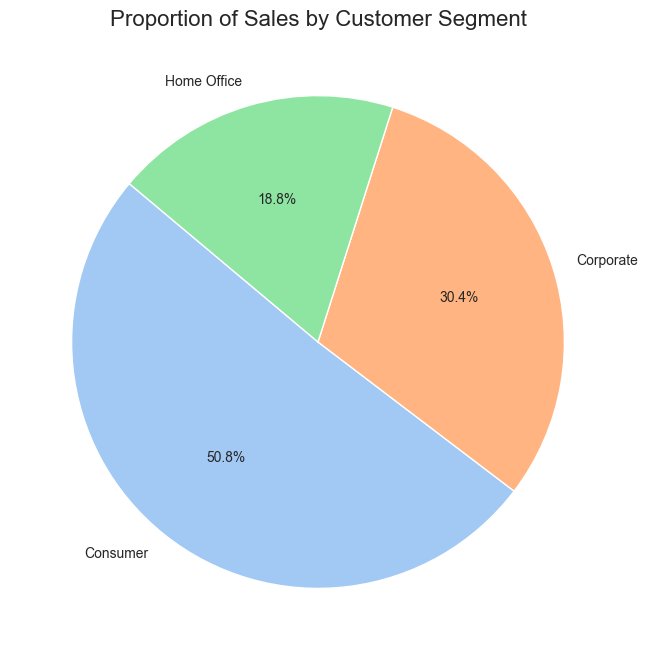

In [13]:
# Create a pie chart to show the proportion of sales from each segment
plt.figure(figsize=(8, 8))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Sales by Customer Segment', fontsize=16)
plt.ylabel('') # Hides the 'Segment' label on the y-axis for a cleaner look
plt.show()


In [14]:
print("\n--- Analyzing Sales Trend Over Time ---")
df['YearMonth'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()


--- Analyzing Sales Trend Over Time ---


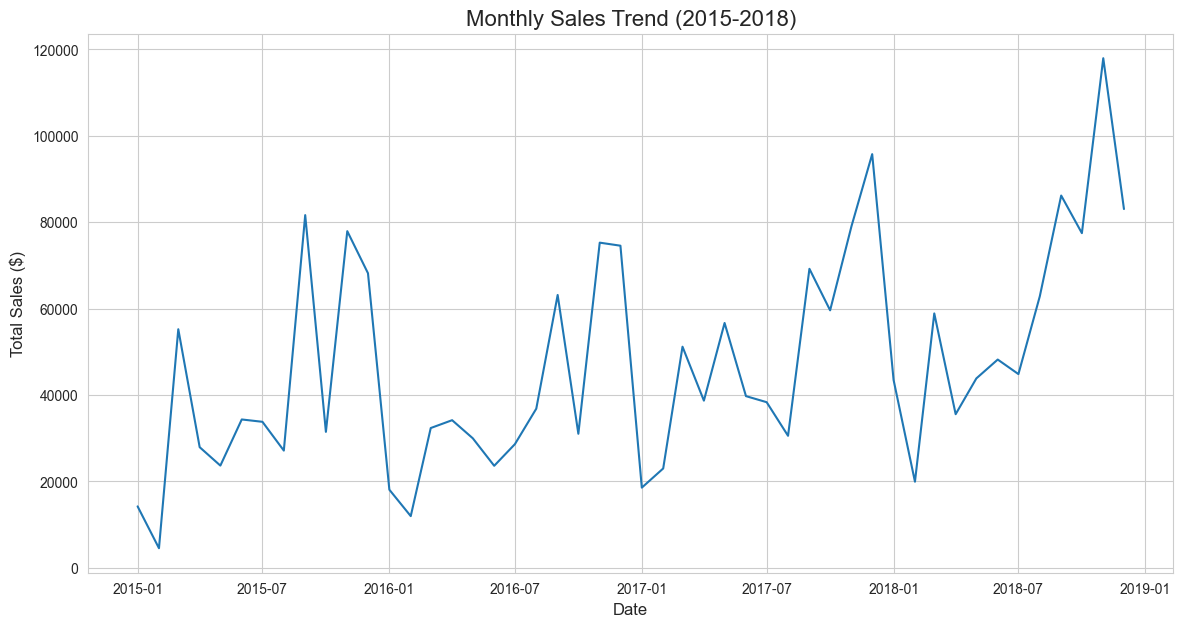

In [15]:
# Create a line chart to visualize the sales trend
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='YearMonth', y='Sales')
plt.title('Monthly Sales Trend (2015-2018)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.show()